### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [2]:
df = pd.read_csv("8.TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


### deleting the column unnamed: 0

In [3]:
df.drop(columns=['Unnamed: 0'], inplace = True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [4]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
df.shape

(1987, 9)

# Exploratory Data Analysis

### Lets plot some graphs for better understanding of data

### Age Graph

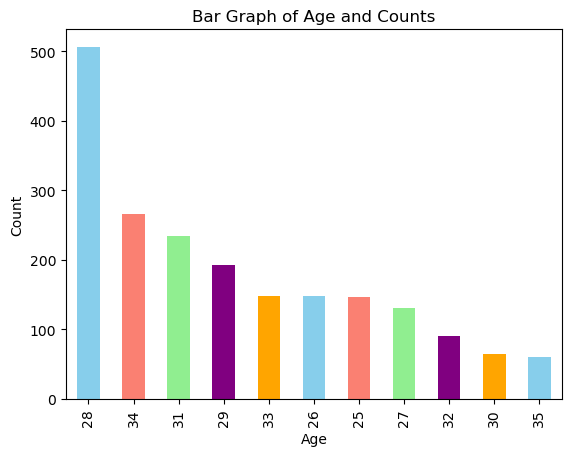

In [9]:
plt.figure()
colors = ['skyblue', 'salmon', 'lightgreen', 'purple', 'orange']  # List of colors
df['Age'].value_counts().plot(kind='bar', color=colors)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar Graph of Age and Counts')
plt.show()

### Employment Graph

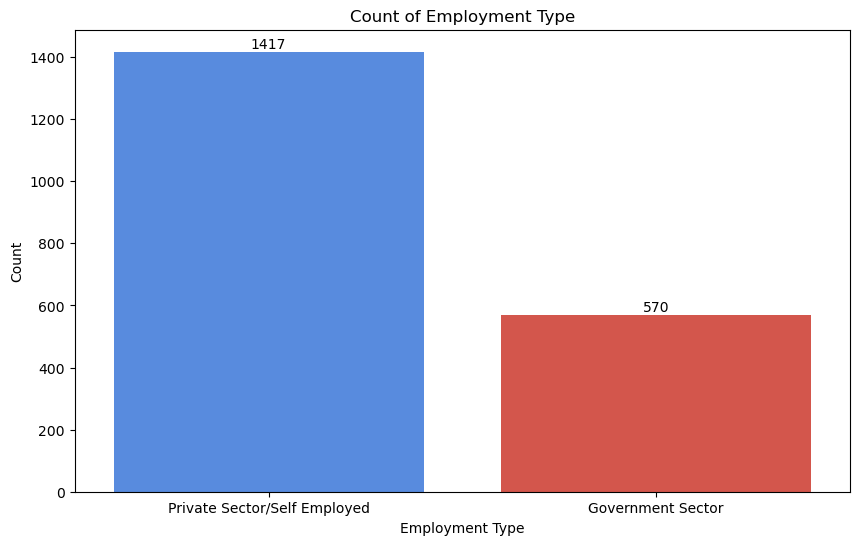

In [10]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Employment Type', order=df['Employment Type'].value_counts().index, palette=colors)
plt.title('Count of Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['Employment Type'].value_counts()[i], ha='center', va='bottom')

plt.show()

### Pie chart of percentage of people in Government or Private Sector

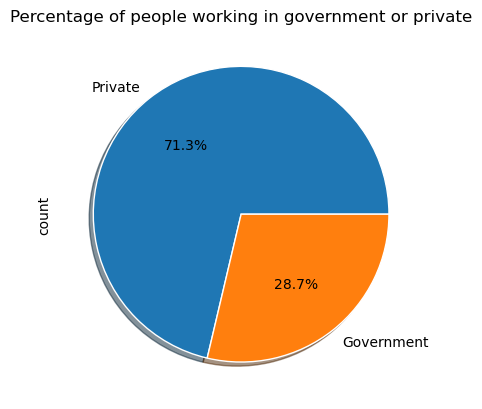

In [11]:
df['Employment Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Private', 'Government'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people working in government or private')
plt.show()

### No. of people graduated

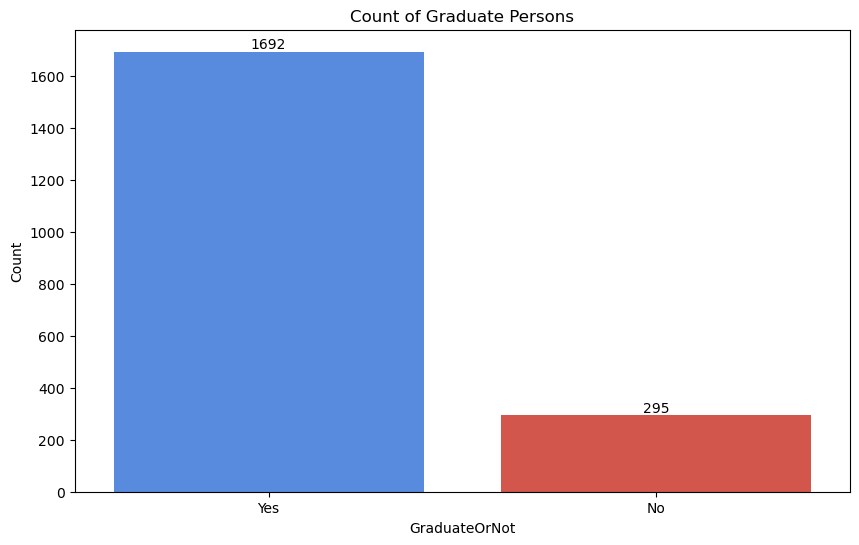

In [12]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GraduateOrNot', order=df['GraduateOrNot'].value_counts().index, palette=colors)
plt.title('Count of Graduate Persons')
plt.xlabel('GraduateOrNot')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['GraduateOrNot'].value_counts()[i], ha='center', va='bottom')

plt.show()

### Pie chart of percentage of people who are graduated

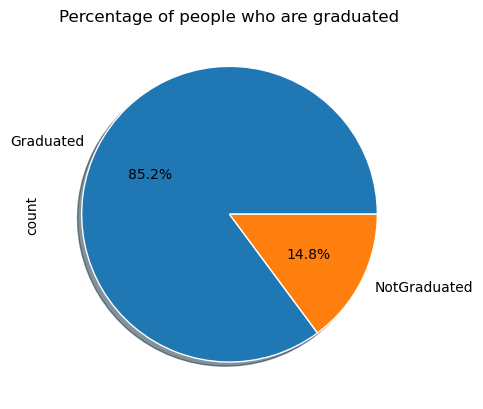

In [13]:
df['GraduateOrNot'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Graduated', 'NotGraduated'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people who are graduated')
plt.show()

### Total Number of Frequent Flyer

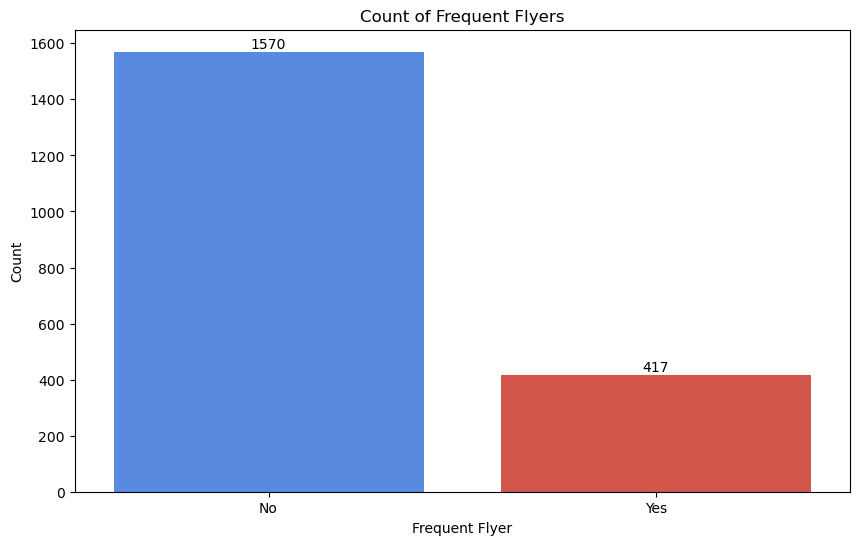

In [14]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FrequentFlyer', order=df['FrequentFlyer'].value_counts().index, palette=colors)
plt.title('Count of Frequent Flyers')
plt.xlabel('Frequent Flyer')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['FrequentFlyer'].value_counts()[i], ha='center', va='bottom')

plt.show()

### Percentage of people who are frequent flyer

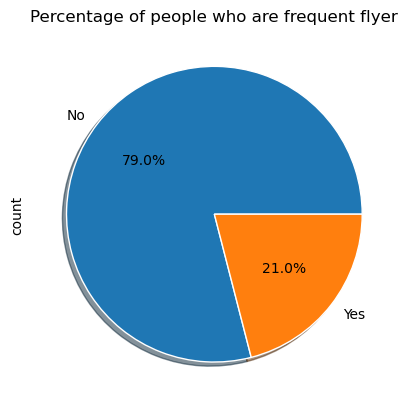

In [15]:
df['FrequentFlyer'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people who are frequent flyer')
plt.show()

### Number of peoples who have travelled abroad

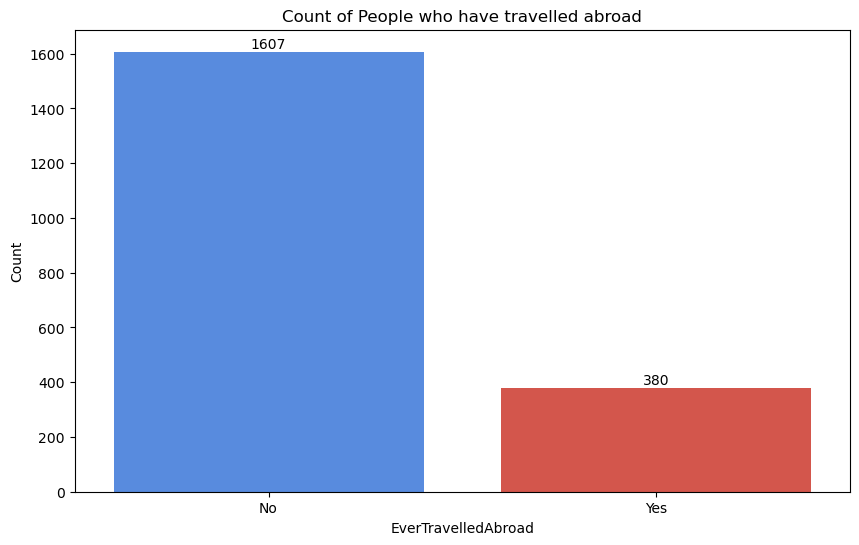

In [16]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='EverTravelledAbroad', order=df['EverTravelledAbroad'].value_counts().index, palette=colors)
plt.title('Count of People who have travelled abroad')
plt.xlabel('EverTravelledAbroad')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['EverTravelledAbroad'].value_counts()[i], ha='center', va='bottom')

plt.show()

### percentage of people who have travelled abroad

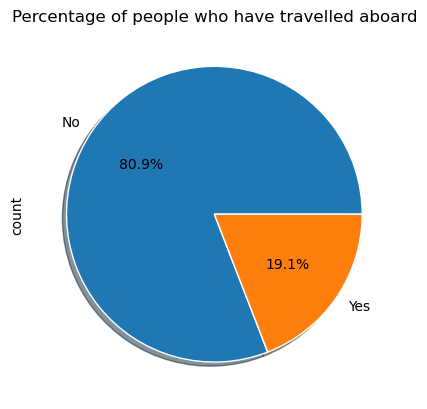

In [17]:
df['EverTravelledAbroad'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people who have travelled aboard')
plt.show()

### Number of people who have chronic diseases

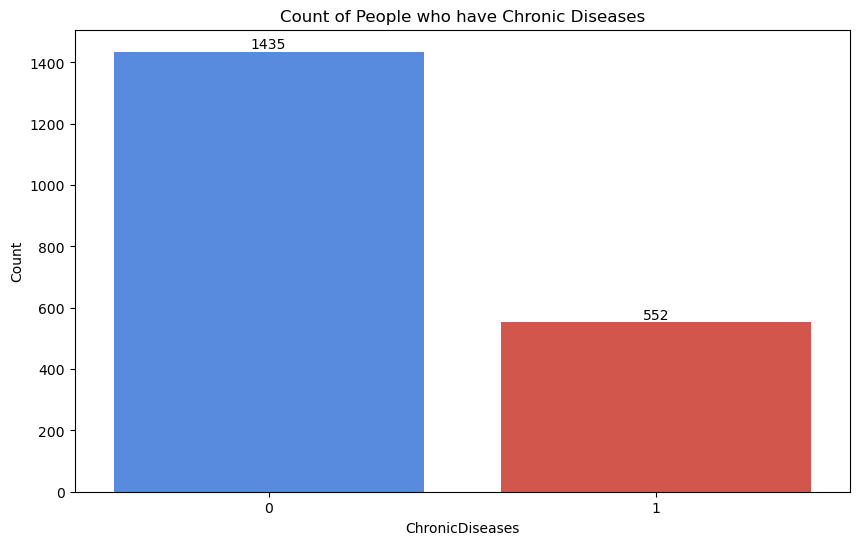

In [18]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChronicDiseases', order=df['ChronicDiseases'].value_counts().index, palette=colors)
plt.title('Count of People who have Chronic Diseases')
plt.xlabel('ChronicDiseases')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['ChronicDiseases'].value_counts()[i], ha='center', va='bottom')

plt.show()

### Percentage of people who have chronic disease

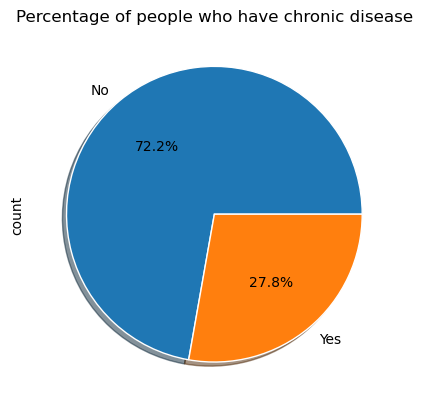

In [19]:
df['ChronicDiseases'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people who have chronic disease')
plt.show()

### peoples who have bought insurance

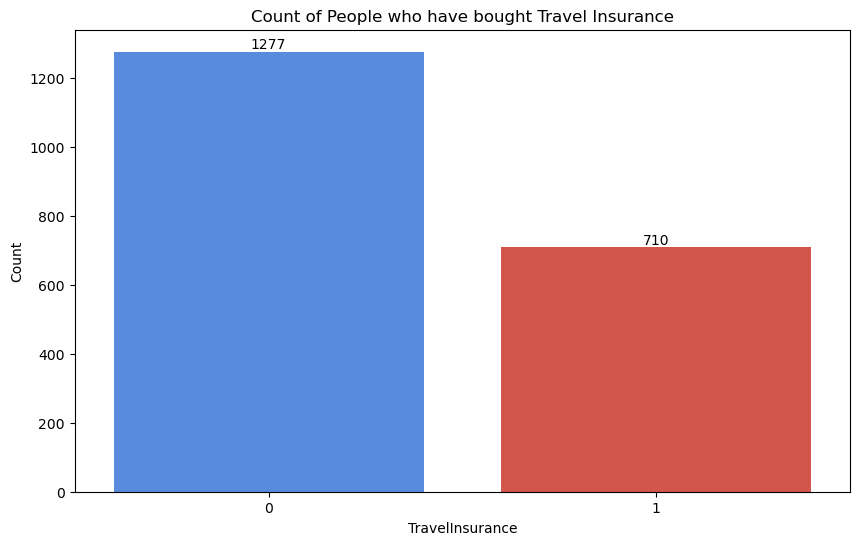

In [20]:
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TravelInsurance', order=df['TravelInsurance'].value_counts().index, palette=colors)
plt.title('Count of People who have bought Travel Insurance')
plt.xlabel('TravelInsurance')
plt.ylabel('Count')

for i, bar in enumerate(plt.gca().patches):
    plt.gca().text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                   df['TravelInsurance'].value_counts()[i], ha='center', va='bottom')

plt.show()

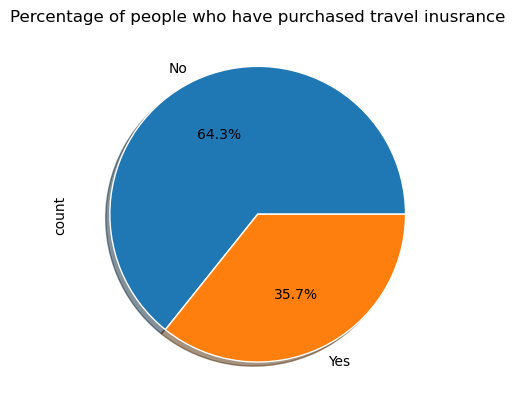

In [21]:
df['TravelInsurance'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people who have purchased travel inusrance')
plt.show()

### Unique Annual Income

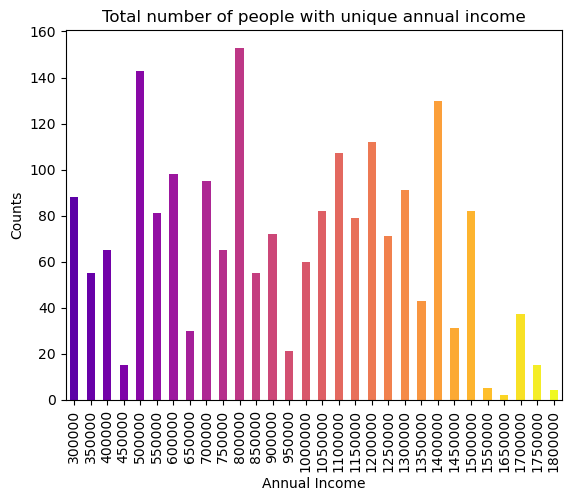

In [22]:
plt.figure()
counts = df['AnnualIncome'].value_counts().sort_index()
colors = plt.cm.plasma(counts.index/max(counts.index))
counts.plot(kind='bar', color=colors)
plt.xlabel('Annual Income')
plt.ylabel('Counts')
plt.title('Total number of people with unique annual income')
plt.show()

### Count of family members

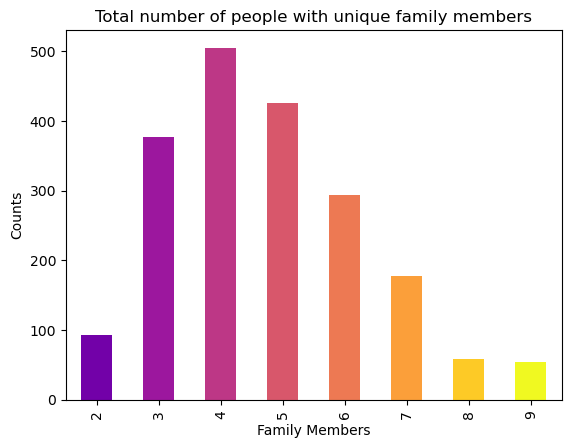

In [23]:
plt.figure()
counts = df['FamilyMembers'].value_counts().sort_index()
colors = plt.cm.plasma(counts.index/max(counts.index))
counts.plot(kind='bar', color=colors)
plt.xlabel('Family Members')
plt.ylabel('Counts')
plt.title('Total number of people with unique family members')
plt.show()

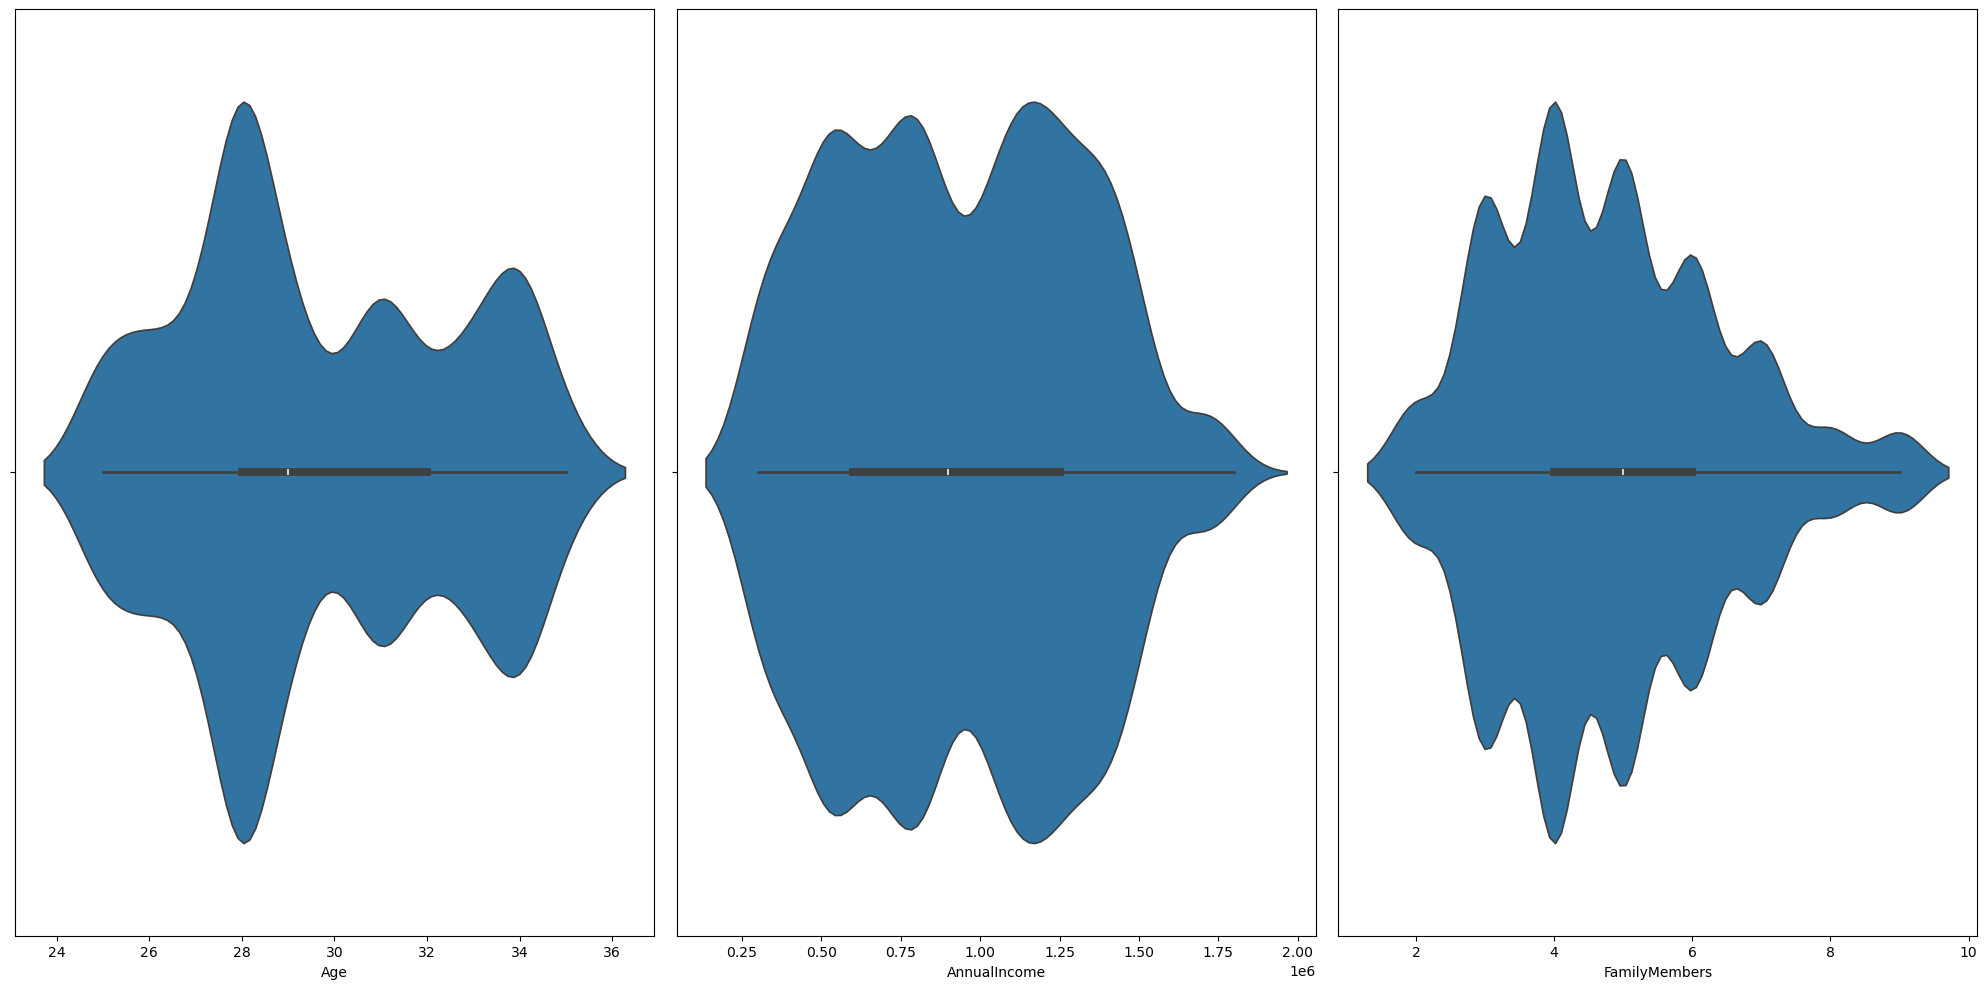

In [24]:
num_vars = ['Age', 'AnnualIncome', 'FamilyMembers']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

### Lets plot a histogram of travel insurance and age by count

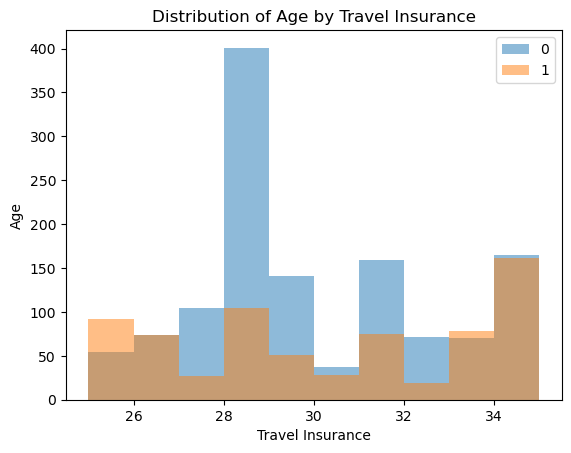

In [25]:
df.groupby('TravelInsurance')['Age'].plot(kind='hist', alpha=0.5)
plt.xlabel('Travel Insurance')
plt.ylabel('Age')
plt.title('Distribution of Age by Travel Insurance')
plt.legend()
plt.show()

### Pie-chart of percentage of people working in Government or Private

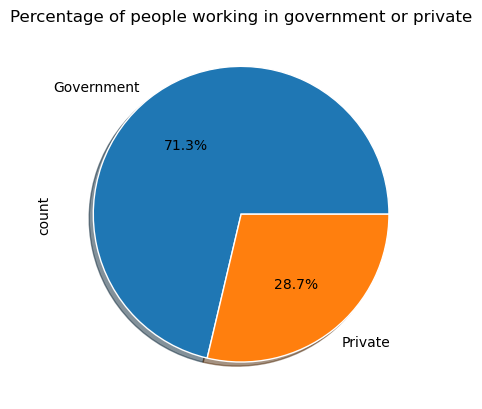

In [26]:
df['Employment Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Government', 'Private'], shadow=True, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Percentage of people working in government or private')
plt.show()

### Checking how many percentage of people are graduated and in government jobs

In [27]:
grp1 = df.groupby('Employment Type')
temp_df = grp1.get_group('Government Sector')
temp_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
9,33,Government Sector,Yes,800000,3,0,Yes,No,0
10,31,Government Sector,Yes,400000,9,1,No,No,0
12,32,Government Sector,Yes,850000,6,0,No,No,1
...,...,...,...,...,...,...,...,...,...
1963,33,Government Sector,Yes,1100000,4,0,No,No,1
1964,28,Government Sector,Yes,1100000,4,0,No,No,0
1968,28,Government Sector,Yes,300000,5,1,No,No,0
1976,32,Government Sector,Yes,900000,6,0,No,No,0


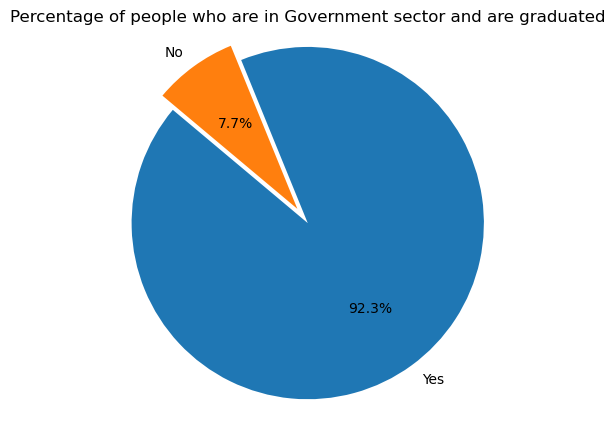

In [28]:
# Data for the pie chart
labels = temp_df['GraduateOrNot'].value_counts().index.tolist()
sizes = temp_df['GraduateOrNot'].value_counts().tolist()

# Create a pie chart
plt.figure(figsize=(5,5 ))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'], explode=(0.1, 0))
plt.title('Percentage of people who are in Government sector and are graduated')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

### Checking how many percentage of people are graduated and in Private Sector/Self Employed

In [29]:
temp_df1 = grp1.get_group('Private Sector/Self Employed')
temp_df1

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


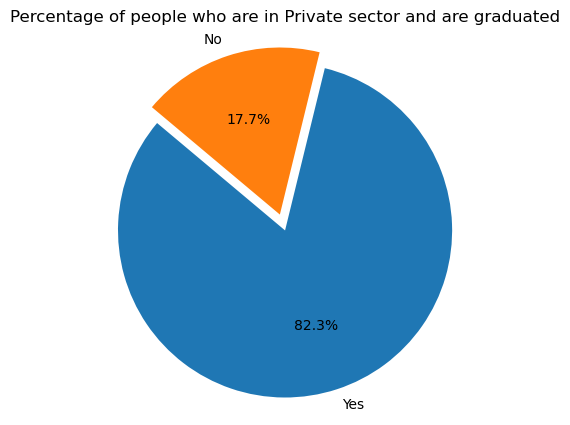

In [30]:
labels = temp_df1['GraduateOrNot'].value_counts().index.tolist()
sizes = temp_df1['GraduateOrNot'].value_counts().tolist()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'], explode=(0.1, 0))
plt.title('Percentage of people who are in Private sector and are graduated')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

### Is employment type important in taking travel insurance?


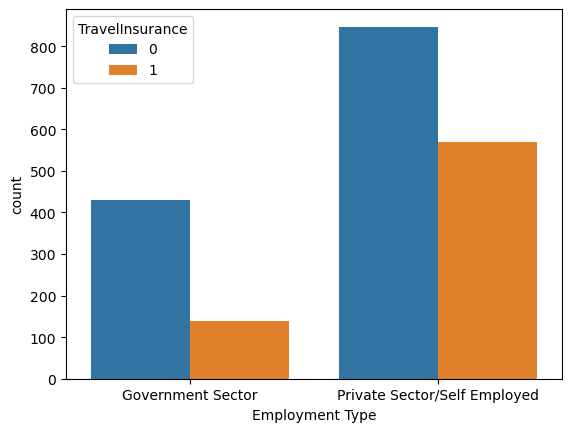

In [31]:
sns.countplot(x = 'Employment Type', data = df, hue = 'TravelInsurance')
plt.show()


### Checking how many Govt/Private employees are frequent flyer


In [32]:
data_emp_fly = pd.crosstab(df['Employment Type'],df['FrequentFlyer'])
data_emp_fly

FrequentFlyer,No,Yes
Employment Type,,
Government Sector,503,67
Private Sector/Self Employed,1067,350


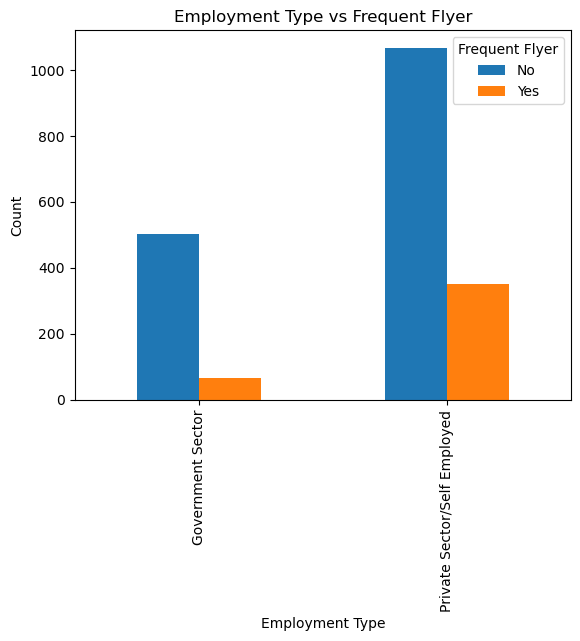

In [33]:
data_emp_fly = pd.crosstab(df['Employment Type'],df['FrequentFlyer'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Employment Type vs Frequent Flyer')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Frequent Flyer', labels=['No', 'Yes'])
plt.show()

### frequently flyer and travelled abroad

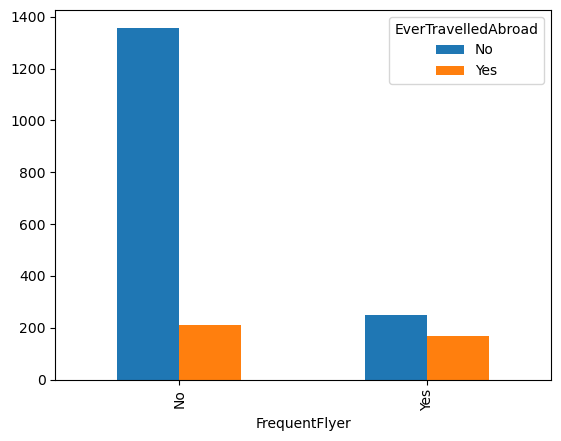

In [34]:
df_bar = pd.crosstab(df['FrequentFlyer'], df['EverTravelledAbroad'])
df_bar.plot(kind='bar')
plt.show()

### Checking annual income of govt sector and private sector

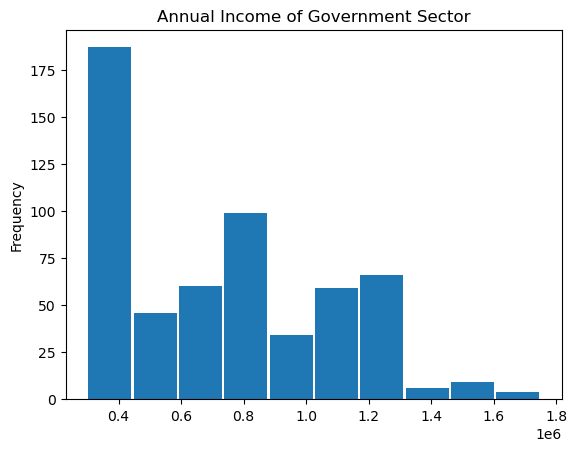

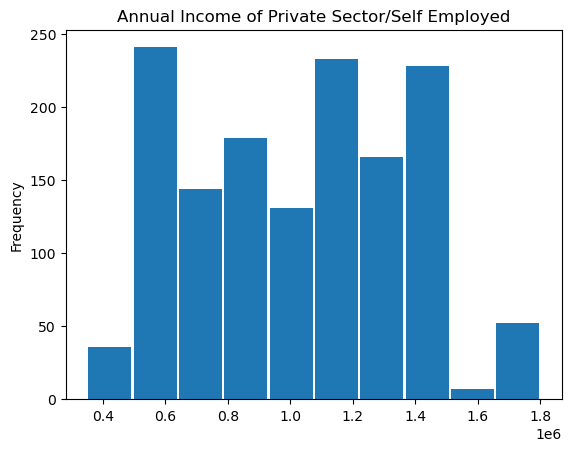

In [35]:
emp_type = ['Government Sector', 'Private Sector/Self Employed']

for typ in emp_type:
    plt.title(f'Annual Income of {typ}')
    df['AnnualIncome'][df['Employment Type'] == typ].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

### Age group in govt sector and private sector

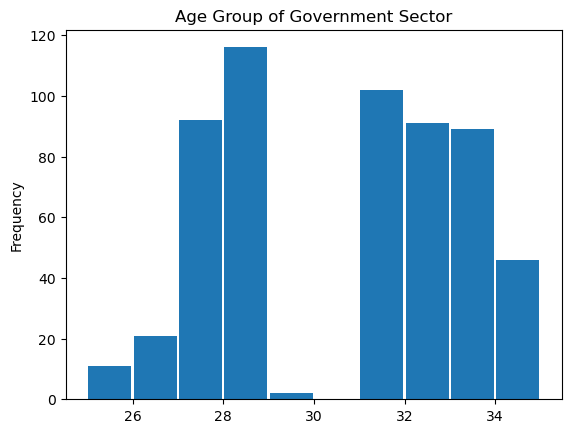

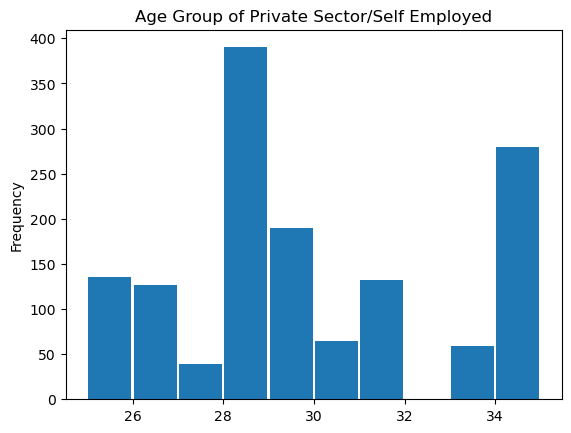

In [36]:
emp_type = ['Government Sector', 'Private Sector/Self Employed']

for typ in emp_type:
    plt.title(f'Age Group of {typ}')
    df['Age'][df['Employment Type'] == typ].plot(kind='hist', rwidth=0.95)
    plt.show()
    print('\n')

### Checking how many Govt/Private employees travels abroad

In [37]:
data_emp_abr = pd.crosstab(df['Employment Type'], df['EverTravelledAbroad'])
data_emp_abr

EverTravelledAbroad,No,Yes
Employment Type,,
Government Sector,525,45
Private Sector/Self Employed,1082,335


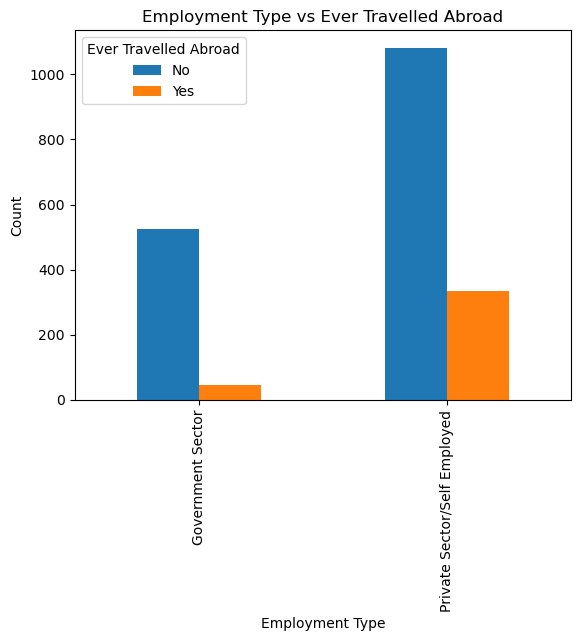

In [38]:
data_emp_fly = pd.crosstab(df['Employment Type'],df['EverTravelledAbroad'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Employment Type vs Ever Travelled Abroad')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Ever Travelled Abroad', labels=['No', 'Yes'])
plt.show()

### Checking how many govt/private employees has taken travel insurance

In [39]:
data_emp_insurance = pd.crosstab(df['Employment Type'], df['TravelInsurance'])
data_emp_insurance

TravelInsurance,0,1
Employment Type,,
Government Sector,430,140
Private Sector/Self Employed,847,570


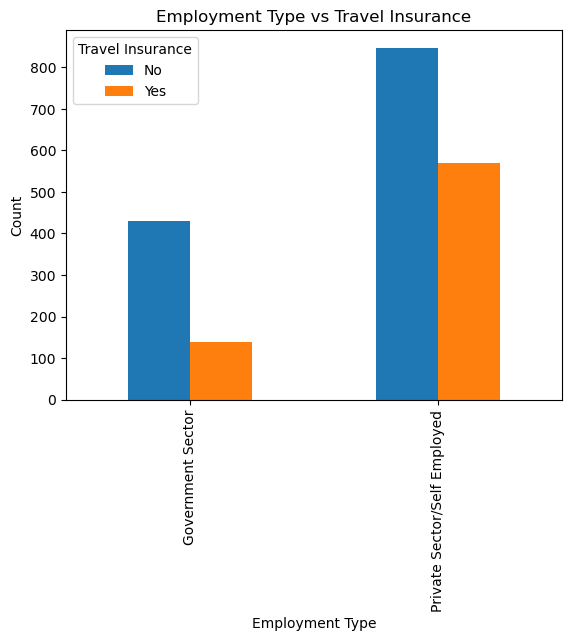

In [40]:
data_emp_fly = pd.crosstab(df['Employment Type'],df['TravelInsurance'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Employment Type vs Travel Insurance')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Travel Insurance', labels=['No', 'Yes'])
plt.show()

### Role of annual income in purchasing travel insurance

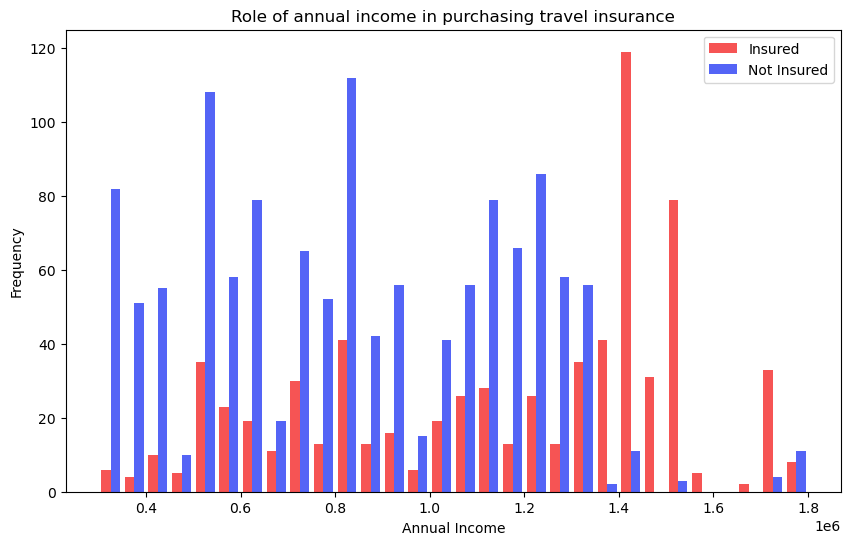

In [41]:
insured = df[df['TravelInsurance'] == 1]['AnnualIncome']
not_insured = df[df['TravelInsurance'] == 0]['AnnualIncome']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist([insured, not_insured], bins=30, color=['#F30C0C', '#0C23F3'], label=['Insured', 'Not Insured'], alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Role of annual income in purchasing travel insurance')
plt.legend()

# Show the plot
plt.show()

### Role of annual income in frequent flyer


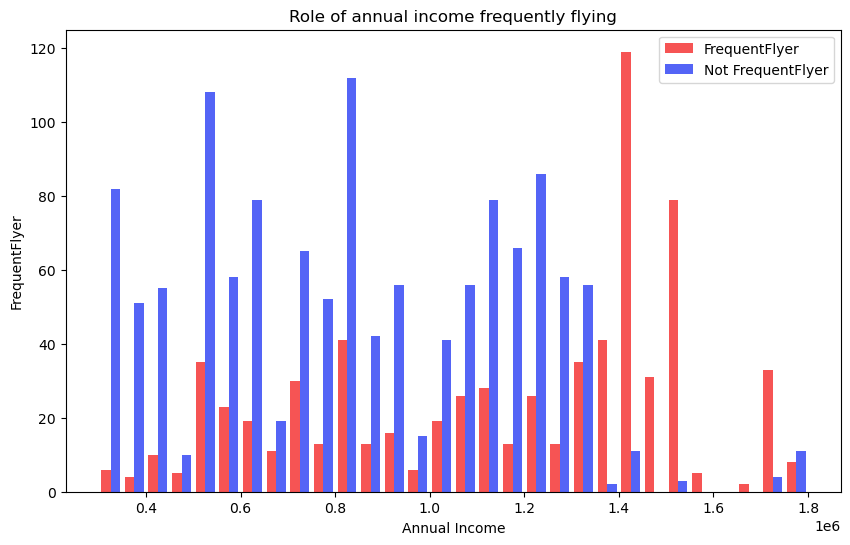

In [42]:
frequent_flyer = df[df['FrequentFlyer'] == 1]['AnnualIncome']
not_frequent_flyer = df[df['FrequentFlyer'] == 0]['AnnualIncome']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist([insured, not_insured], bins=30, color=['#F30C0C', '#0C23F3'], label=['FrequentFlyer', 'Not FrequentFlyer'], alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('FrequentFlyer')
plt.title('Role of annual income frequently flying')
plt.legend()

# Show the plot
plt.show()

### Role of annual income in travelling abroad

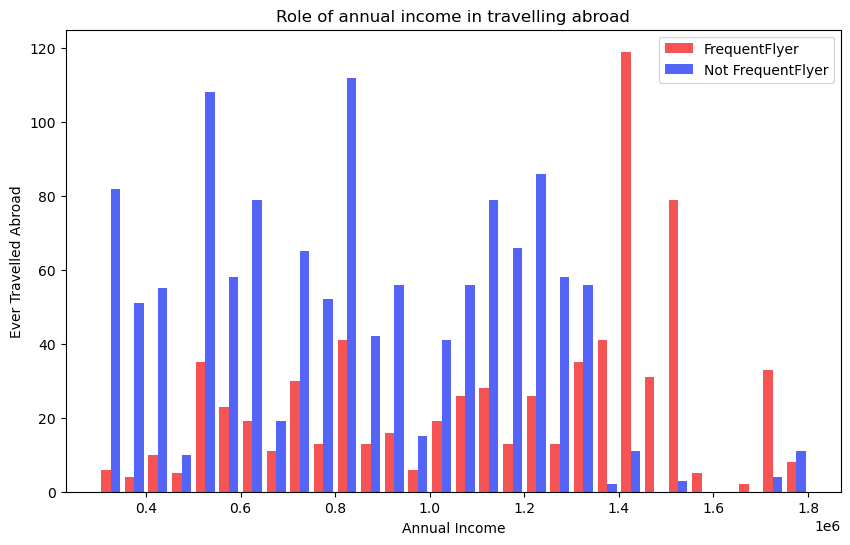

In [43]:
abroad = df[df['EverTravelledAbroad'] == 1]['AnnualIncome']
not_abroad = df[df['EverTravelledAbroad'] == 0]['AnnualIncome']

# Plotting histograms
plt.figure(figsize=(10, 6))
plt.hist([insured, not_insured], bins=30, color=['#F30C0C', '#0C23F3'], label=['FrequentFlyer', 'Not FrequentFlyer'], alpha=0.7)
plt.xlabel('Annual Income')
plt.ylabel('Ever Travelled Abroad')
plt.title('Role of annual income in travelling abroad')
plt.legend()

# Show the plot
plt.show()

### Checking how many of persons who travelled abroad have taken travel insurance

In [44]:
data_abroad_insurance = pd.crosstab(df['EverTravelledAbroad'], df['TravelInsurance'])
data_abroad_insurance

TravelInsurance,0,1
EverTravelledAbroad,,
No,1195,412
Yes,82,298


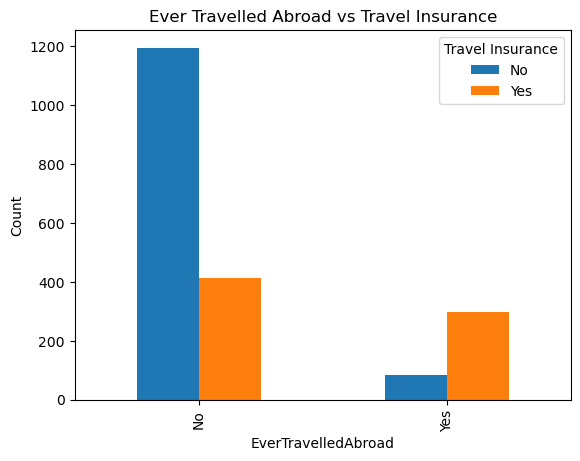

In [45]:
data_emp_fly = pd.crosstab(df['EverTravelledAbroad'],df['TravelInsurance'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Ever Travelled Abroad vs Travel Insurance')
plt.xlabel('EverTravelledAbroad')
plt.ylabel('Count')
plt.legend(title='Travel Insurance', labels=['No', 'Yes'])
plt.show()

### Checking how many of persons who are frequent flyer have taken travel insurance

In [46]:
data_abroad_insurance = pd.crosstab(df['FrequentFlyer'], df['TravelInsurance'])
data_abroad_insurance

TravelInsurance,0,1
FrequentFlyer,,
No,1099,471
Yes,178,239


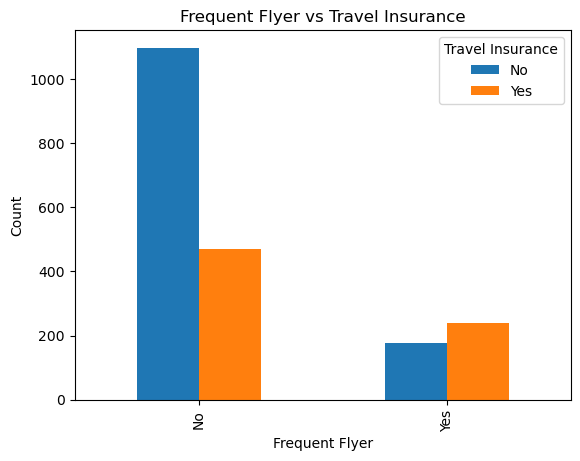

In [47]:
data_emp_fly = pd.crosstab(df['FrequentFlyer'],df['TravelInsurance'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Frequent Flyer vs Travel Insurance')
plt.xlabel('Frequent Flyer')
plt.ylabel('Count')
plt.legend(title='Travel Insurance', labels=['No', 'Yes'])
plt.show()

### Checking by age who has taken travel insurance

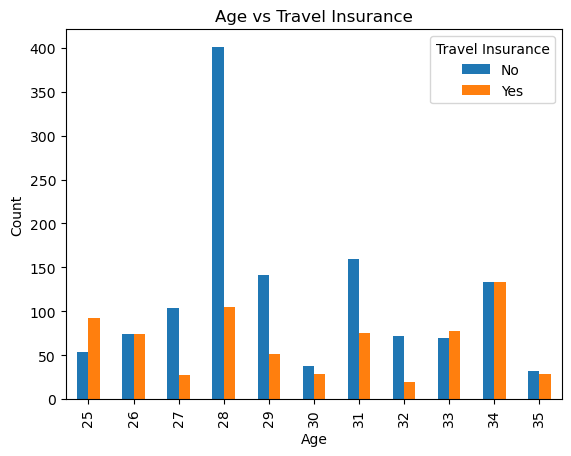

In [48]:
data_emp_fly = pd.crosstab(df['Age'],df['TravelInsurance'])
data_emp_fly.plot(kind="bar", legend=True)
plt.title('Age vs Travel Insurance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Travel Insurance', labels=['No', 'Yes'])
plt.show()

### Role of graduation in purchasing travel insurance

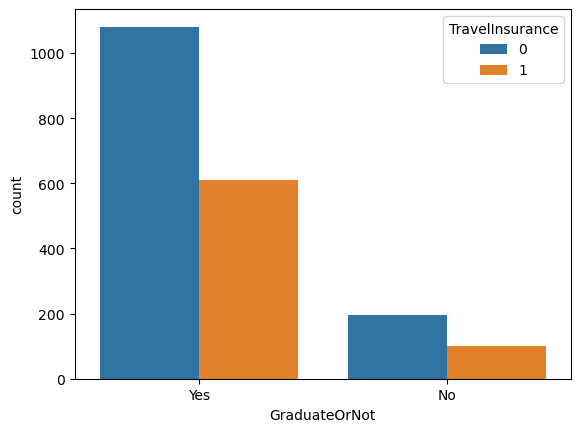

In [49]:
sns.countplot(x = df['GraduateOrNot'],hue=df['TravelInsurance'])
plt.show()

### Checkin how many persons with chronic disease has taken travel insurance

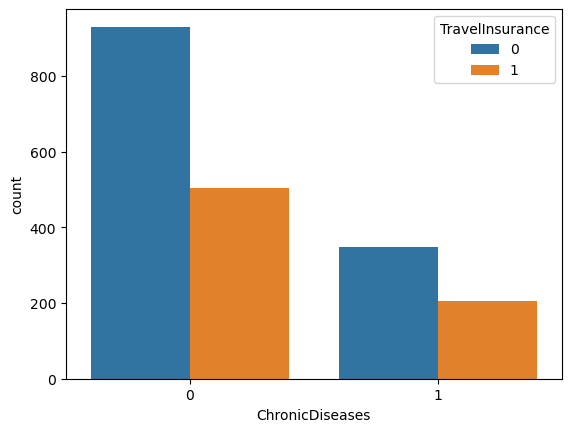

In [50]:
sns.countplot(x = df['ChronicDiseases'],hue=df['TravelInsurance'])
plt.show()

### Average income by age

In [51]:
temp_df = df[["AnnualIncome","Age","Employment Type"]]
temp_df

,AnnualIncome,Age,Employment Type
0,400000,31,Government Sector
1,1250000,31,Private Sector/Self Employed
2,500000,34,Private Sector/Self Employed
3,700000,28,Private Sector/Self Employed
4,700000,28,Private Sector/Self Employed
...,...,...,...
1982,1500000,33,Private Sector/Self Employed
1983,1750000,28,Private Sector/Self Employed
1984,1150000,28,Private Sector/Self Employed
1985,1000000,34,Private Sector/Self Employed


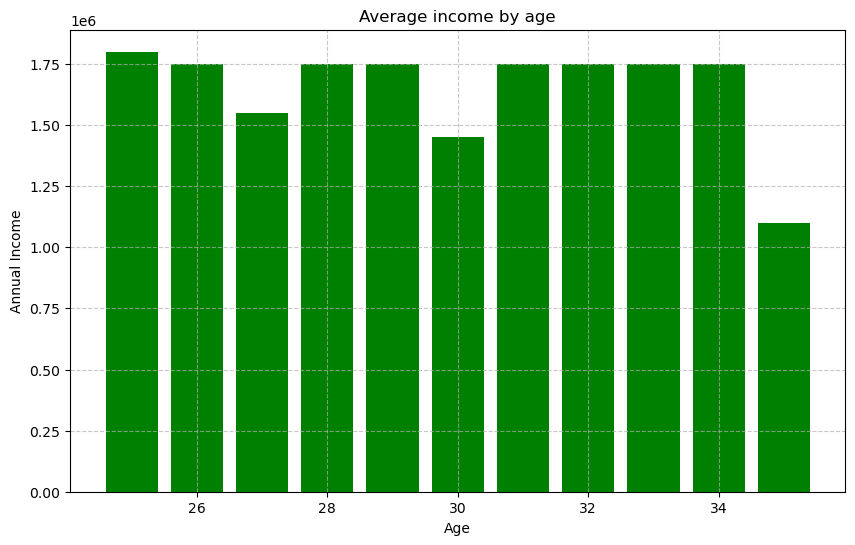

In [52]:
plt.figure(figsize=(10, 6))
plt.bar(temp_df['Age'], temp_df['AnnualIncome'], color='green')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Average income by age')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### Age group of people earning more than 1.3 mil

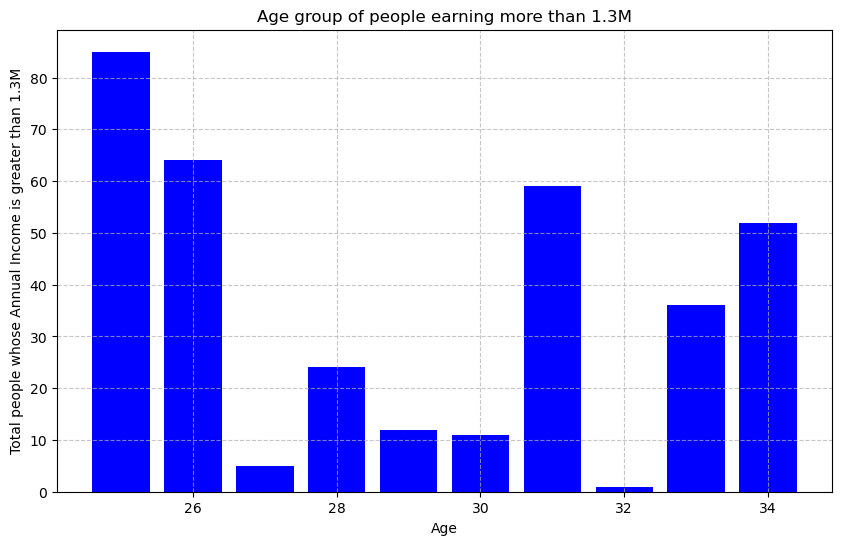

In [53]:
# Correcting the column name
income_greater = temp_df[temp_df['AnnualIncome'] > 1300000].groupby('Age').size()
income_greater = income_greater.reset_index(name='Total People whose annual income is greater than 1.3M')

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(income_greater['Age'], income_greater['Total People whose annual income is greater than 1.3M'], color='Blue')
plt.xlabel('Age')
plt.ylabel('Total people whose Annual Income is greater than 1.3M')
plt.title('Age group of people earning more than 1.3M')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [54]:
new_df = df.copy()
le = preprocessing.LabelEncoder()
new_df['Employment Type'] = le.fit_transform(new_df['Employment Type'])
new_df['FrequentFlyer'] = le.fit_transform(new_df['FrequentFlyer'])
new_df['EverTravelledAbroad'] = le.fit_transform(new_df['EverTravelledAbroad'])
new_df['GraduateOrNot'] = le.fit_transform(new_df['GraduateOrNot'])

In [55]:
new_df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


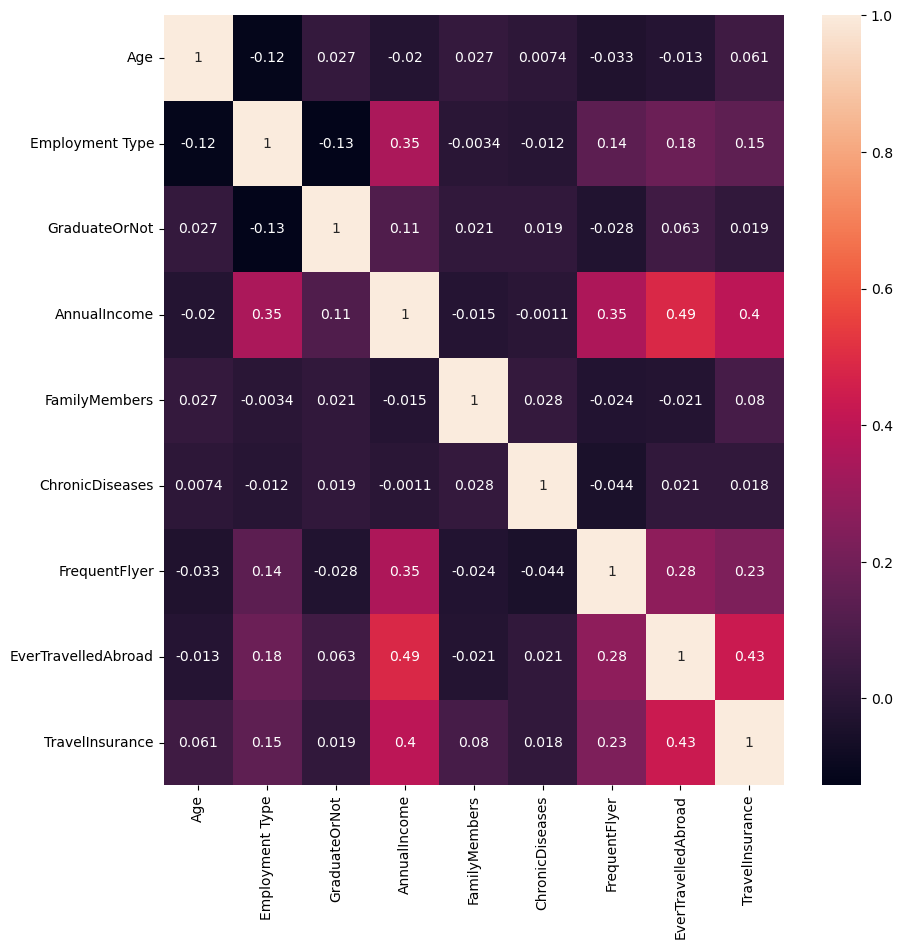

In [56]:
correlation_matrix = new_df.corr()
plt.figure(figsize = (10,10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.show()


# Machine Learning


### Importing Libraries

In [57]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import reciprocal, uniform
from sklearn.model_selection import GridSearchCV

### Train-test Split

In [58]:
X = new_df.drop('TravelInsurance', axis = 1)

In [59]:
X.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0,1,400000,6,1,0,0
1,31,1,1,1250000,7,0,0,0
2,34,1,1,500000,4,1,0,0
3,28,1,1,700000,3,1,0,0
4,28,1,1,700000,8,1,1,0


In [60]:
y = df['TravelInsurance']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: TravelInsurance, dtype: int64

##### Splitting the data in train and test

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
len(X_train), len(X_test)

(1589, 398)

### Logistic Regression

In [63]:
lr = LogisticRegression()

In [64]:
lr.fit(X_train,y_train)

LogisticRegression()

In [65]:
LogisticRegressionScore = lr.score(X_test,y_test)
LogisticRegressionScore

0.7613065326633166

In [66]:
logistic_clf = LogisticRegression(max_iter=1000, solver='liblinear')

# Define hyperparameter search space
param_distributions = {
    "C": reciprocal(0.001, 1000),  # Regularization parameter
}

# Perform randomized search
rnd_search_cv = RandomizedSearchCV(logistic_clf, param_distributions, n_iter=10, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters:", rnd_search_cv.best_params_)

# Best estimator
best_logistic_clf = rnd_search_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ............................C=0.0028301916322952315; total time=   0.0s
[CV] END ............................C=0.0028301916322952315; total time=   0.0s
[CV] END ............................C=0.0028301916322952315; total time=   0.0s
[CV] END ............................C=0.0028301916322952315; total time=   0.0s
[CV] END ............................C=0.0028301916322952315; total time=   0.0s
[CV] END ..............................C=0.14611469233093488; total time=   0.0s
[CV] END ..............................C=0.14611469233093488; total time=   0.0s
[CV] END ..............................C=0.14611469233093488; total time=   0.0s
[CV] END ..............................C=0.14611469233093488; total time=   0.0s
[CV] END ..............................C=0.14611469233093488; total time=   0.0s
[CV] END ..............................C=0.01960302335880739; total time=   0.0s
[CV] END ..............................C=0.01960

In [67]:
rnd_search_cv.best_estimator_


LogisticRegression(C=0.009018904842117467, max_iter=1000, solver='liblinear')

In [68]:
rnd_search_cv.best_score_


0.7690296212527032

In [69]:
print("Accuracy obtained by Logistic Regression model:",rnd_search_cv.best_score_*100)

Accuracy obtained by Logistic Regression model: 76.90296212527032


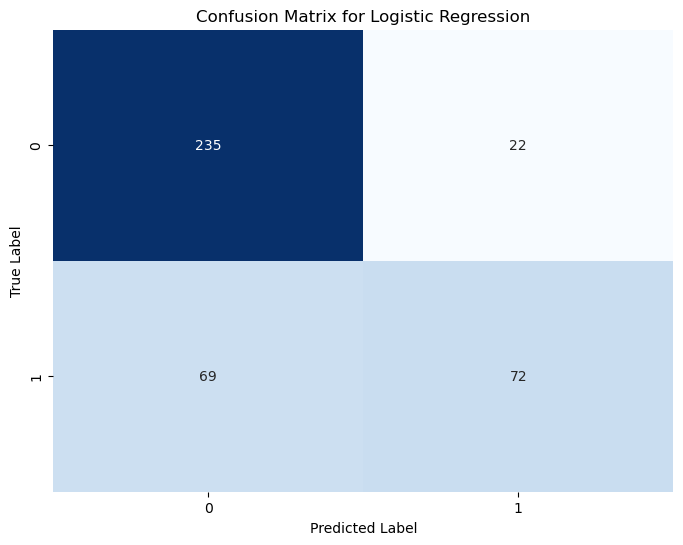

In [70]:
y_pred_lr = best_logistic_clf.predict(X_test_scaled)

# Create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [71]:
cm = confusion_matrix(y_test, y_pred_lr)

# Extract the true positives, true negatives, false negatives, and false positives
tn, fp, fn, tp = cm.ravel()

# Print the results
print("True Positives:", tp)
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)


True Positives: 72
True Negatives: 235
False Positives: 22
False Negatives: 69


In [72]:
from sklearn.metrics import classification_report

# Get the predictions for the test data
y_pred_lr = best_logistic_clf.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred_lr)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.77      0.91      0.84       257
           1       0.77      0.51      0.61       141

    accuracy                           0.77       398
   macro avg       0.77      0.71      0.73       398
weighted avg       0.77      0.77      0.76       398



### Random Forest Classifier

In [73]:
rfc_1 = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [500, 1000, 2000],
    'max_depth': [2, 4, 6, 8],
    'ccp_alpha': [0.1, 0.3, 0.6, 0.8]
    }

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc_1, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'ccp_alpha': [0.1, 0.3, 0.6, 0.8],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [500, 1000, 2000]})

In [74]:
rfc = RandomForestClassifier(n_estimators=2000, max_depth = 2, ccp_alpha = 0.1, class_weight='balanced' )
rfc.fit(X_train, y_train)
_score = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, _score)*100 ,2), "%")

Accuracy Score : 79.65 %


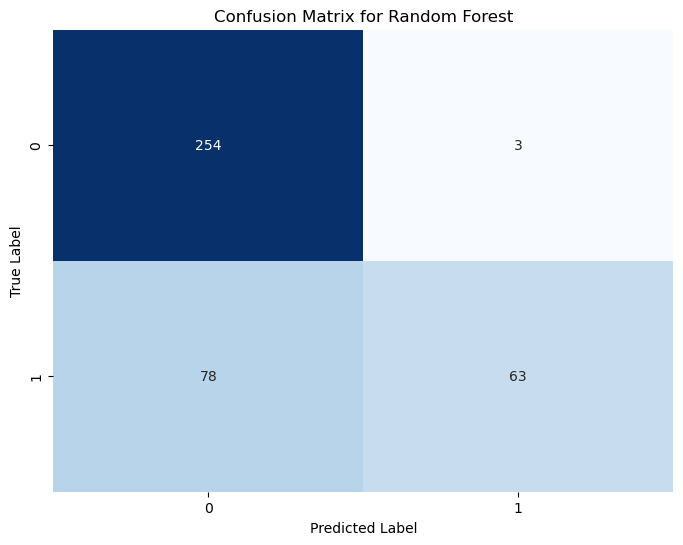

In [75]:
y_pred_rf = rfc.predict(X_test)

# Create confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest")
plt.show()


In [76]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Extract the true positives, true negatives, false negatives, and false positives
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()

# Print the results
print("True Positives:", tp_rf)
print("True Negatives:", tn_rf)
print("False Positives:", fp_rf)
print("False Negatives:", fn_rf)

True Positives: 63
True Negatives: 254
False Positives: 3
False Negatives: 78


In [77]:
y_pred_rf = rfc.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_rf)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       0.77      0.99      0.86       257
           1       0.95      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.86      0.72      0.74       398
weighted avg       0.83      0.80      0.77       398



### XGBoost

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an instance of the XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [500,1000,1500,2000],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.3, 0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1500, 'random_state': 42, 'subsample': 1.0}


In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=2000, max_depth=3, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
XGB_score = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, XGB_score)*100 ,2), "%")

Accuracy Score : 83.92 %


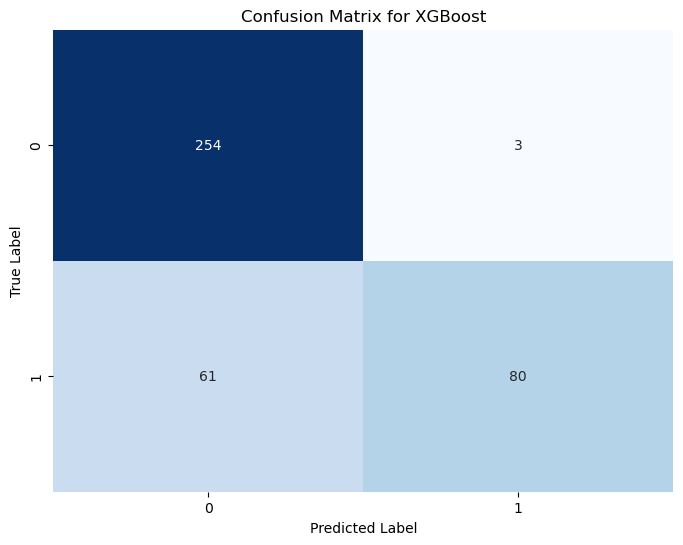

In [81]:
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for XGBoost")
plt.show()


In [82]:
cm_xgb = confusion_matrix(y_test, y_pred)

# Extract the true positives, true negatives, false negatives, and false positives
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()

# Print the results
print("True Positives:", tp_xgb)
print("True Negatives:", tn_xgb)
print("False Positives:", fp_xgb)
print("False Negatives:", fn_xgb)

True Positives: 80
True Negatives: 254
False Positives: 3
False Negatives: 61


In [83]:
y_pred_xgb = xgb.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred_xgb)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.96      0.57      0.71       141

    accuracy                           0.84       398
   macro avg       0.89      0.78      0.80       398
weighted avg       0.86      0.84      0.83       398



### Comparing the models

In [84]:
# Compare the classification reports

# Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       257
           1       0.77      0.51      0.61       141

    accuracy                           0.77       398
   macro avg       0.77      0.71      0.73       398
weighted avg       0.77      0.77      0.76       398

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86       257
           1       0.95      0.45      0.61       141

    accuracy                           0.80       398
   macro avg       0.86      0.72      0.74       398
weighted avg       0.83      0.80      0.77       398

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       257
           1       0.96      0.57      0.71       141

    accuracy                           0.84       398
   macro avg     

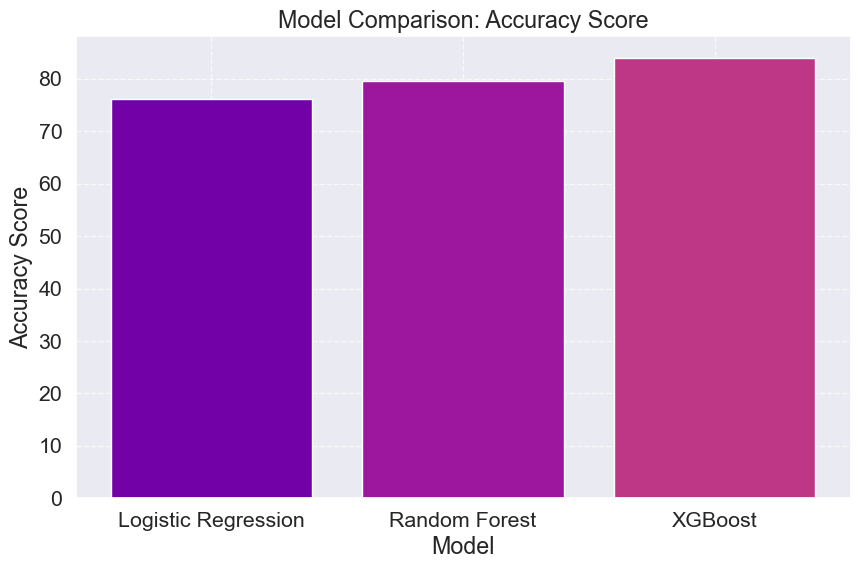

In [92]:
# prompt: plot a graph comparing models accuracy

import matplotlib.pyplot as plt

# Create a bar chart of model accuracy
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [LogisticRegressionScore*100, rfc.score(X_test, y_test)*100, xgb.score(X_test, y_test)*100]

plt.figure(figsize=(10, 6))
colors = plt.cm.plasma(counts.index/max(counts.index))
plt.bar(models, accuracy_scores,color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison: Accuracy Score')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
